In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd

In [12]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [19]:
# Determine columns
first_row_measurement = session.query(Measurements).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd281c641d0>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [20]:
# Design a query to retrieve the last 12 months of precipitation data
precipitation = session.query(Measurements.date, func.avg(Measurements.prcp)).\
    group_by(Measurements.date).\
    order_by(Measurements.date.desc()).limit(365).all()
precipitation

[('2017-08-23', 0.1325),
 ('2017-08-22', 0.16666666666666666),
 ('2017-08-21', 0.19333333333333336),
 ('2017-08-20', 0.005),
 ('2017-08-19', 0.03),
 ('2017-08-18', 0.02),
 ('2017-08-17', 0.0475),
 ('2017-08-16', 0.1525),
 ('2017-08-15', 0.164),
 ('2017-08-14', 0.062),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.04666666666666667),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.0175),
 ('2017-08-09', 0.049999999999999996),
 ('2017-08-08', 0.11000000000000001),
 ('2017-08-07', 0.0125),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.03),
 ('2017-08-04', 0.015),
 ('2017-08-03', 0.017499999999999998),
 ('2017-08-02', 0.075),
 ('2017-08-01', 0.04666666666666666),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.06),
 ('2017-07-29', 0.10166666666666667),
 ('2017-07-28', 0.11),
 ('2017-07-27', 0.0016666666666666668),
 ('2017-07-26', 0.08333333333333333),
 ('2017-07-25', 0.08714285714285715),
 ('2017-07-24', 0.6539999999999999),
 ('2017-07-23', 0.22600000000000003),
 ('2017-07-22', 0.7366666666666667),
 ('2017-07-21', 0.

In [21]:
# Save query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns=['Date', 'Average Precipitation (in)'])
precipitation_df.set_index('Date', inplace=True, )
precipitation_df = precipitation_df.iloc[::-1]
precipitation_df

,Average Precipitation (in)
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


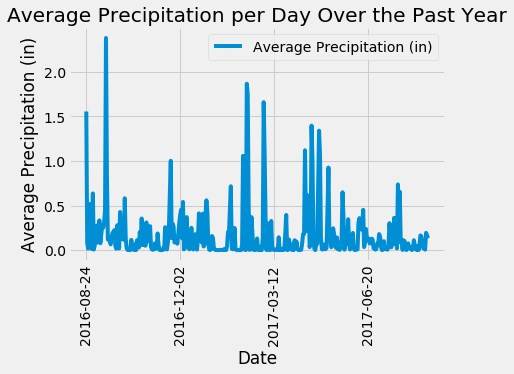

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_plot = precipitation_df.plot(rot=90, title= "Average Precipitation per Day Over the Past Year")
prcp_plot.set_ylabel("Average Precipitation (in)")
plt.savefig("Images/AvgPrecPerDay.png")

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Average Precipitation (in)
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [26]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).all()

print("There are " + str(len(station_count)) + " stations in this dataset.")

There are 9 stations in this dataset.


In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# gets the station name of the most active station
most_active_station = session.query(Measurements.station).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.station).desc()).first()
most_active_station

('USC00519281')

In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station_data = session.query(Measurements.station, func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)).\
    filter(Measurements.station == most_active_station[0]).all()

print("The lowest temperature recorded at station " + most_active_station_data[0][0] + " is " + str(most_active_station_data[0][1]) + " degrees.")
print("The highest temperature recorded at station " + most_active_station_data[0][0] + " is " + str(most_active_station_data[0][2]) + " degrees.")
print("The average temperature at station " + most_active_station_data[0][0] + " is " + str(round(most_active_station_data[0][3], 2)) + " degrees.")

The lowest temperature recorded at station USC00519281 is 54.0 degrees.
The highest temperature recorded at station USC00519281 is 85.0 degrees.
The average temperature at station USC00519281 is 71.66 degrees.


In [30]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tob_12month = session.query(Measurements.date, Measurements.tobs).\
    filter(Measurements.station==most_active_station[0]).\
    filter(Measurements.date > '2016-08-18').\
    order_by(Measurements.date.desc()).all()
tob_12month

[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

In [31]:
# extracts only the TOB's from the list above
tobs = [item[1] for item in tob_12month]
tobs

[79.0,
 76.0,
 76.0,
 77.0,
 77.0,
 77.0,
 83.0,
 82.0,
 77.0,
 76.0,
 81.0,
 82.0,
 81.0,
 76.0,
 75.0,
 77.0,
 75.0,
 82.0,
 77.0,
 77.0,
 77.0,
 76.0,
 76.0,
 76.0,
 80.0,
 80.0,
 76.0,
 74.0,
 74.0,
 72.0,
 69.0,
 78.0,
 78.0,
 75.0,
 74.0,
 77.0,
 78.0,
 76.0,
 81.0,
 79.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 71.0,
 77.0,
 72.0,
 72.0,
 74.0,
 72.0,
 72.0,
 75.0,
 79.0,
 73.0,
 75.0,
 74.0,
 76.0,
 74.0,
 74.0,
 74.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 77.0,
 76.0,
 76.0,
 80.0,
 75.0,
 72.0,
 74.0,
 80.0,
 74.0,
 74.0,
 74.0,
 74.0,
 71.0,
 71.0,
 74.0,
 76.0,
 68.0,
 69.0,
 74.0,
 74.0,
 74.0,
 77.0,
 76.0,
 75.0,
 70.0,
 74.0,
 67.0,
 70.0,
 75.0,
 79.0,
 70.0,
 75.0,
 70.0,
 75.0,
 65.0,
 60.0,
 72.0,
 67.0,
 70.0,
 74.0,
 72.0,
 68.0,
 76.0,
 72.0,
 69.0,
 76.0,
 67.0,
 68.0,
 67.0,
 71.0,
 78.0,
 74.0,
 69.0,
 69.0,
 70.0,
 67.0,
 78.0,
 77.0,
 74.0,
 67.0,
 71.0,
 67.0,
 70.0,
 75.0,
 74.0,
 71.0,
 73.0,
 68.0,
 74.0,
 76.0,
 77.0,
 76.0,
 71.0,
 72.0,
 73.0,
 72.0,
 69.0,

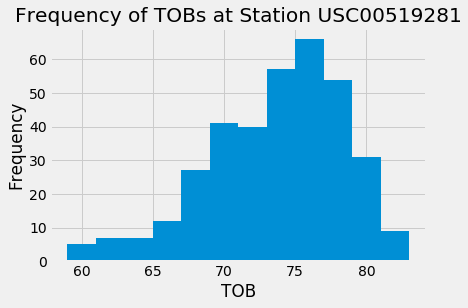

In [32]:
# histogram to show frequencies of TOBs from most active station
plt.hist(tobs, bins=12)
plt.xlabel("TOB")
plt.ylabel("Frequency")
plt.title("Frequency of TOBs at Station " +  most_active_station[0])
plt.savefig("Images/FreqOfTOBs.png")
plt.show()

## Bonus Challenge Assignment

In [33]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip2011 = calc_temps('2011-02-28', '2011-03-05')
trip2011

[(61.0, 69.75510204081633, 75.0)]

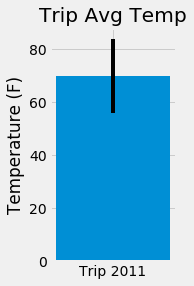

In [40]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(2,4))
plt.bar("Trip 2011", trip2011[0][1], width=0.2, yerr=[trip2011[0][2]-trip2011[0][0]])
plt.ylabel("Temperature (F)")
plt.title("Trip Avg Temp")
plt.savefig("Images/TripAvgTemp.png")
plt.show()

In [41]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
trip_dates = ['2011-02-28', '2011-03-05']

trip_prcp = session.query(Measurements.station, func.sum(Measurements.prcp), Stations.latitude, Stations.longitude, Stations.elevation).\
    filter(Measurements.date >= trip_dates[0]).\
    filter(Measurements.date <= trip_dates[-1]).\
    filter(Measurements.station == Stations.station).\
    group_by(Measurements.station).\
    order_by(func.sum(Measurements.prcp).desc()).all()
trip_prcp

[('USC00518838', 2.33, 21.4992, -158.0111, 306.6),
 ('USC00519281', 2.23, 21.45167, -157.84888999999998, 32.9),
 ('USC00519523', 2.19, 21.33556, -157.71139, 19.5),
 ('USC00514830', 1.96, 21.5213, -157.8374, 7.0),
 ('USC00516128', 1.45, 21.3331, -157.8025, 152.4),
 ('USC00513117', 1.44, 21.4234, -157.8015, 14.6),
 ('USC00519397', 1.38, 21.2716, -157.8168, 3.0),
 ('USC00511918', 0.63, 21.3152, -157.9992, 0.9),
 ('USC00517948', None, 21.3934, -157.9751, 11.9)]

In [42]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurements.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [43]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

trip_days = ["02-28", "03-01", "03-02", "03-03", "03-04", "03-05"]
normals = [daily_normals(date)[0] for date in trip_days]
normals

[(65.0, 70.65517241379311, 80.0),
 (64.0, 70.0327868852459, 76.0),
 (61.0, 70.36666666666666, 78.0),
 (60.0, 70.06896551724138, 78.0),
 (57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0)]

In [44]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns=["tmin", "tavg", "tmax"], index = trip_days)
normals_df

,tmin,tavg,tmax
02-28,65.0,70.655172,80.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0
03-05,60.0,67.890909,76.0


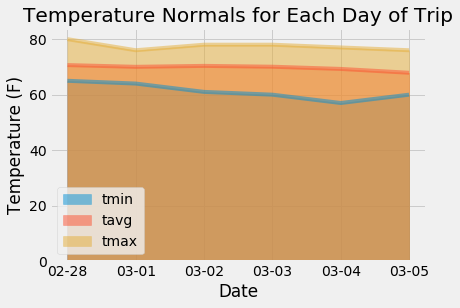

In [45]:
# Plot the daily normals as an area plot with `stacked=False`
area_plot = normals_df.plot.area(stacked=False, title="Temperature Normals for Each Day of Trip")
area_plot.set_xlabel("Date")
area_plot.set_ylabel("Temperature (F)")
plt.savefig("Images/TempNormEaDay.png")